<a href="https://colab.research.google.com/github/raf-esc/alura_challenge_data_science_2/blob/main/alura_challenge_data_science_2_semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura - Challenge Data Science 2 - Semana 1

## 1ª Tarefa - Preparar o Ambiente e Carregar a Base de Dados

In [ ]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=aa30468cb2c64421ca3484bf94e5c0e795bec5f77958af341cb4b5288ad1835a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.types import IntegerType, DoubleType

In [ ]:
findspark.init()

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.json('/content/drive/MyDrive/Alura/Challenge - Data Science 2')

In [ ]:
df.show(10, truncate = False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------

In [ ]:
df.limit(10).toPandas()

,anuncio,imagens,usuario
0,"(0, [], [16], [0], [], (Centro, 20061003, Rio ...","[(39d6282a-71f3-47bc-94aa-909351ecd881, https:...","(9d44563d-3405-4e84-9381-35b7cf40a9a4, Frank)"
1,"(0, [], [14], [0], [], (Centro, 20051040, Rio ...","[(23d2b3ab-45b0-47f2-a27f-ffbe066c2c38, https:...","(36245be7-70fe-40cd-84d4-70a57dc8f976, Caroline)"
2,"(0, [1026], [1026], [0], [], (Maria da Graça, ...","[(1da65baa-368b-490f-bef7-1834b9a428c1, https:...","(9dc415d8-1397-4d8d-8425-b8310fad309d, Oliver)"
3,"(0, [120], [120], [0], [Portão eletrônico, Con...","[(79b542c6-49b4-4f06-80b5-ef4fcdf98f76, https:...","(9911a2df-f299-4a73-a384-281417abaf69, Matthew)"
4,"(0, [3], [3], [0], [], (São Cristóvão, 2093167...","[(e2bc497b-6510-4731-8942-97b3d3cdab5e, https:...","(240a7aab-12e5-4069-9a2c-9dca4c4f9c68, Jude)"
5,"(0, [20], [15], [1], [], (Centro, 20231047, Ri...","[(2de09d46-dc0d-47cf-aed2-a34e1dacce90, https:...","(3c7057f5-0923-42eb-8b6d-25f3e61155ef, David)"
6,"(3, [43], [43], [1], [Academia, Churrasqueira,...","[(147a80d9-cd40-4a57-bece-a45ea729ddae, https:...","(5a9736b5-aaa0-4a35-8632-26bbd8bd5cbe, Hope)"
7,"(2, [42], [42], [1], [Churrasqueira, Playgroun...","[(35740004-063d-489b-b84c-f278c018e9f3, https:...","(ec48d96a-137c-49d5-ad7a-66c39932f599, Margareth)"
8,"(0, [], [12], [0], [Portaria 24h, Elevador], (...","[(6d3d2aec-c96f-4e57-8b31-8400af100b65, https:...","(dad7db63-e19c-4420-a64d-f3052ffbba4b, Sean)"
9,"(1, [41], [41], [1], [Portaria 24h, Condomínio...","[(3d404069-418e-4a3f-a087-f4007f701869, https:...","(a845f35f-3ab3-4619-9e53-259a6539af60, Nicole)"


## 2ª Tarefa - Explorar a base de dados utilizando recursos do PySpark

In [ ]:
df.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

In [ ]:
df.count()

89083

## 3ª Tarefa - Transformar cada campo da coluna "anuncio" em uma coluna separada

Nossa base de dados possui 3 campos principais:

- anuncio

- imagens

- usuario

Para nossa análise, apenas as informações do campo "anuncio" serão relevantes. Por isso, vamos focar em analisar as colunas desse campo.

Dicionário de dados:

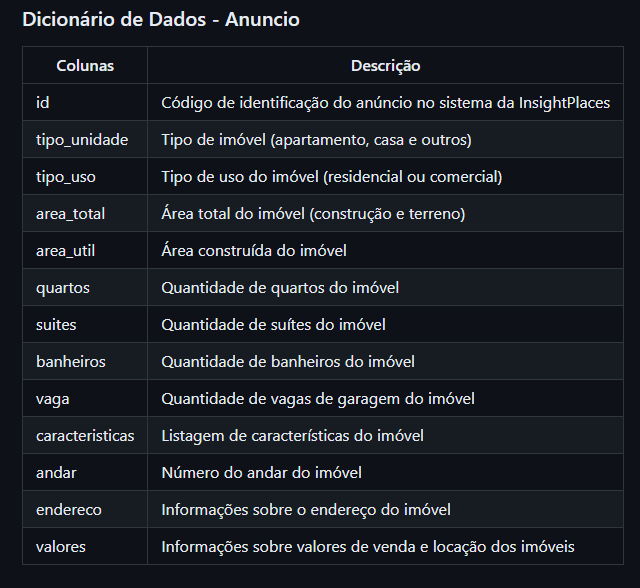

[fonte](https://github.com/millenagena/Challenge-Data-Science-Alura-2ed/blob/main/1-Transformando-os-dados/dados/README.md#dicion%C3%A1rio-de-dados---anuncio)

In [ ]:
df_anuncios = df.select('anuncio.*')

In [ ]:
df_anuncios.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+----------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                                     |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                     |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+

## 4ª Tarefa - Filtrar a base de dados

O time de Data Science solicitou que fizéssemos alguns filtros nas colunas tipo_uso, tipo_unidade e tipo_anuncio da nossa base de dados:

- tipo_uso: Residencial;

- tipo_unidade: Apartamento;

- tipo_anuncio: Usado.

In [ ]:
freq_tipo_uso = df_anuncios.select('tipo_uso').groupBy('tipo_uso')\
.agg(f.count('tipo_uso').alias('frequencia')).orderBy('frequencia')

freq_tipo_uso.show()

+-----------+----------+
|   tipo_uso|frequencia|
+-----------+----------+
|  Comercial|      4542|
|Residencial|     84541|
+-----------+----------+



In [ ]:
freq_tipo_unidade = df_anuncios.select('tipo_unidade').groupBy('tipo_unidade')\
.agg(f.count('tipo_unidade').alias('frequencia')).orderBy('frequencia')

freq_tipo_unidade.show()

+------------+----------+
|tipo_unidade|frequencia|
+------------+----------+
|        Casa|     10319|
|      Outros|     11963|
| Apartamento|     66801|
+------------+----------+



In [ ]:
df_anuncios.select('tipo_anuncio').groupBy('tipo_anuncio')\
.agg(f.count('tipo_anuncio').alias('frequencia')).orderBy('frequencia').show()

+------------+----------+
|tipo_anuncio|frequencia|
+------------+----------+
|  Lançamento|       256|
|       Usado|     88827|
+------------+----------+



In [ ]:
df_filtrado_1 = df_anuncios\
.filter('tipo_uso == "Residencial"')

df_filtrado_1.show(10, truncate = False)
print(f'Número de registros no dataframe após primeira filtragem: {df_filtrado_1.count()}.')

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                                     |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--

In [ ]:
df_filtrado_2 = df_filtrado_1\
.filter('tipo_unidade == "Apartamento"')

df_filtrado_2.show(10, truncate = False)
print(f'Número de registros no dataframe após segunda filtragem: {df_filtrado_2.count()}.')

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_filtrado_final = df_filtrado_2\
.filter('tipo_anuncio == "Usado"')

df_filtrado_final.show(10, truncate = False)
print(f'Número de registros no dataframe após terceira filtragem: {df_filtrado_final.count()}.')

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

## 5ª Tarefa - Transformar as colunas dos cômodos dos imóveis de listas para inteiros

Como pessoas engenheiras de dados, nós queremos entregar a base de dados de forma mais estruturada para que o time de ciência de dados possa realizar os tratamentos e criação do modelo de machine learning.

Nesse contexto, transforme os dados das colunas "quartos", "suites", "banheiros", "vaga", "area_total" e "area_util" de listas para inteiros.

In [ ]:
df_filtrado_final.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- area_util: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- banheiros: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (c

In [ ]:
df_filtrado_final.select('area_total').withColumn('tamanho_array', f.size(df_filtrado_final['area_total'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|57368|
|            0| 9194|
+-------------+-----+



In [ ]:
df_filtrado_final.select('area_util').withColumn('tamanho_array', f.size(df_filtrado_final['area_util'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|66562|
+-------------+-----+



In [ ]:
df_filtrado_final.select('banheiros').withColumn('tamanho_array', f.size(df_filtrado_final['banheiros'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|66562|
+-------------+-----+



In [ ]:
df_filtrado_final.select('quartos').withColumn('tamanho_array', f.size(df_filtrado_final['quartos'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|66562|
+-------------+-----+



In [ ]:
df_filtrado_final.select('suites').withColumn('tamanho_array', f.size(df_filtrado_final['suites'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|61008|
|            0| 5554|
+-------------+-----+



In [ ]:
df_filtrado_final.select('vaga').withColumn('tamanho_array', f.size(df_filtrado_final['vaga'])).groupBy('tamanho_array').count().show()

+-------------+-----+
|tamanho_array|count|
+-------------+-----+
|            1|63545|
|            0| 3017|
+-------------+-----+



In [ ]:
df_area_total_convertida = df_filtrado_final.withColumn('area_total', df_filtrado_final['area_total'][0].cast(IntegerType()))


df_area_total_convertida.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_area_total_convertida.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- banheiros: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- tipo_anuncio: string 

In [ ]:
df_area_util_convertida = df_area_total_convertida.withColumn('area_util', df_area_total_convertida['area_util'][0].cast(IntegerType()))


df_area_util_convertida.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_area_util_convertida.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (n

In [ ]:
df_banheiros_convertida = df_area_util_convertida.withColumn('banheiros', df_area_util_convertida['banheiros'][0].cast(IntegerType()))


df_banheiros_convertida.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_banheiros_convertida.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nulla

In [ ]:
df_quartos_convertida = df_banheiros_convertida.withColumn('quartos', df_banheiros_convertida['quartos'][0].cast(IntegerType()))


df_quartos_convertida.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_quartos_convertida.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: array (nullable = tru

In [ ]:
df_suites_convertida = df_quartos_convertida.withColumn('suites', df_quartos_convertida['suites'][0].cast(IntegerType()))


df_suites_convertida.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_suites_convertida.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: array (nullable = true)
 |    |-- element: long (containsNull = t

In [ ]:
df_convertido_final = df_suites_convertida.withColumn('vaga', df_suites_convertida['vaga'][0].cast(IntegerType()))


df_convertido_final.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+--------------

In [ ]:
df_convertido_final.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 

## 6ª Tarefa - Tratamento de informações sobre localização

A equipe de ciência de dados nos solicitou que apenas as informações sobre bairro e zona da cidade fossem extraídas.

Então, vamos analisar a coluna endereco e transformar apenas as informações sobre bairro e zona em colunas de nosso DataFrame.

In [ ]:
df_com_localizacao = df_convertido_final.withColumn('bairro', df_convertido_final['endereco']['bairro']).withColumn('zona', df_convertido_final['endereco']['zona'])

df_com_localizacao.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+---------+----------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |endereco                                                                                                               |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |bairro   |zona      |
+-----+----------+---------+---------+----------------------------------------------------------------------------------------------------

In [ ]:
df_com_localizacao.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 

In [ ]:
df_com_localizacao_sem_endereco = df_com_localizacao.drop('endereco')

df_com_localizacao_sem_endereco.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+---------+----------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|valores                    |bairro   |zona      |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------------------------+---------+----------+
|3    |43        |43       |1        |[Academia, Churrasqueira, Pla

In [ ]:
df_com_localizacao_sem_endereco.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- condominio: string (nullable = true)
 |    |    |-- iptu: string (nullable = true)
 |    |    |-- tipo: string (nullable = true)
 |    |    |-- valor: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)



## 7ª Tarefa - Transformar cada campo da coluna "valores" em uma coluna separada

Pensando em simplificar a compreensão dos dados para as pessoas cientistas de dados, vamos entender a estrutura da coluna valores que é a mais importante da base de dados.

root

 |-- valores: array (nullable = true)

 |    |-- element: struct (containsNull = true)

 |    |    |-- condominio: string (nullable = true)

 |    |    |-- iptu: string (nullable = true)

 |    |    |-- tipo: string (nullable = true)

 |    |    |-- valor: string (nullable = true)

Podemos observar que os valores são do tipo array, ou seja, uma lista que contém elementos. Estes elementos são dicionários com as informações de condominio, iptu, tipo, e valor

Nesse contexto, transforme os dados da coluna valores em colunas separadas.

In [ ]:
df_com_valores_separados = df_com_localizacao_sem_endereco\
.withColumn('condominio', df_com_localizacao_sem_endereco['valores'][0]['condominio'].cast(DoubleType()))\
.withColumn('iptu', df_com_localizacao_sem_endereco['valores'][0]['iptu'].cast(DoubleType()))\
.withColumn('tipo_valor', df_com_localizacao_sem_endereco['valores'][0]['tipo'])\
.withColumn('valor', df_com_localizacao_sem_endereco['valores'][0]['valor'].cast(DoubleType()))\
.drop('valores')

df_com_valores_separados.show(10, truncate = False)

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+----------+-------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro   |zona      |condominio|iptu|tipo_valor|valor  |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+----------+-------+
|3    |43        |43       |1        |[Academi

In [ ]:
df_com_valores_separados.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: double (nullable = true)



In [ ]:
df_filtro_final = df_com_valores_separados.filter('tipo_valor == "Venda"')

df_filtro_final.show(10, truncate = False)
print(f'Número de registros no dataframe após última filtragem: {df_filtro_final.count()}.')

+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+----------+-------+
|andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |id                                  |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro   |zona      |condominio|iptu|tipo_valor|valor  |
+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------+-------+------+------------+------------+-----------+----+---------+----------+----------+----+----------+-------+
|3    |43        |43       |1        |[Academi

In [ ]:
df_filtro_final.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo_valor: string (nullable = true)
 |-- valor: double (nullable = true)



In [ ]:
spark.stop()